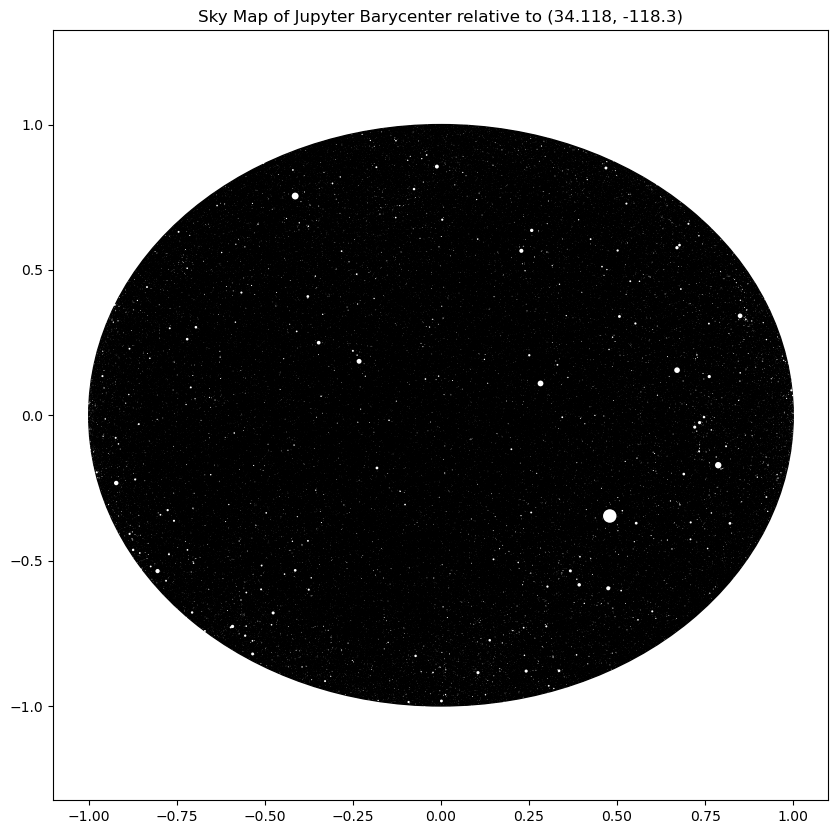

In [94]:
from skyfield.api import Star, load, wgs84
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    stars=hipparcos.load_dataframe(f)
lat, long = 34.118, -118.3  # Change to your location
t=load.timescale().now()

observer=wgs84.latlon(latitude_degrees=lat,longitude_degrees=long).at(t)

planets = load('de421.bsp')
earth = planets['Earth Barycenter']
position = observer.from_altaz(alt_degrees=90, az_degrees=0)
ra,dec,distance=observer.radec()
center_object=Star(dec=dec,ra=ra)

center=earth.at(t).observe(center_object)
projection = build_stereographic_projection(center)
field_of_view_degrees = 180.0

star_positions = earth.at(t).observe(Star.from_dataframe(stars))
stars['x'], stars['y'] = projection(star_positions)

chart_size = 10 
max_star_size = 100
limiting_magnitude = 10

bright_stars = (stars.magnitude <= limiting_magnitude)
magnitude = stars['magnitude'][bright_stars]
marker_size = max_star_size * 10 ** (magnitude / -2.5)

fig, ax = plt.subplots(figsize=(chart_size, chart_size))

border = plt.Circle((0, 0), 1, color='black', fill=True)
ax.add_patch(border)

ax.scatter(stars['x'][bright_stars], stars['y'][bright_stars],
           s=marker_size, color='white', marker='.', linewidths=0, 
           zorder=2)
plt.title(f"Sky Map of Jupyter Barycenter relative to ({lat}, {long})")
plt.show()
